# TP : Classification de voitures

## Chargement des données
Dans ce TP, nous voulons classifier des voitures, selon leur type (sportive, citadine, familiale...). Commençons par charger les données dans Basthon :

1. Télécharger <a href="https://raw.githubusercontent.com/cpge-itc/itc2/main/files/voitures.csv" download>les données (clic droit ici puis enregistrer la cible du lien sous)</a>.  
2. Dans Basthon, cliquer sur Fichier puis Ouvrir et sélectionner le fichier téléchargé.
3. Exécuter le code ci-dessous, en modifiant titanic.csv si vous avez utilisé un autre nom de fichier.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

voitures = pd.read_csv("voitures.csv")
voitures

,nom,marque,cylindrée,chevaux,longueur,largeur,hauteur,poids,vitesse_max,0_100,consommation
0,panda,fiat,1242,69,365,164,155,1030,164,15.0,5.7
1,tt,audi,2000,200,404,176,135,1400,235,7.0,7.0
2,208,peugeot,1200,100,398,174,146,1050,163,14.0,3.8
3,c3,citroën,1124,61,385,167,152,998,157,16.0,5.4
4,berlingo,citroën,1360,75,411,172,180,1378,149,16.0,7.4
5,clio 4,renault,1149,75,406,173,145,1105,177,12.0,5.0
6,mégane 1,renault,1998,115,413,170,142,1085,197,9.7,7.3
7,espace,renault,1870,117,466,186,173,1897,176,14.0,9.7
8,2008,peugeot,1398,68,416,174,156,1200,190,9.5,5.7
9,captur,renault,1333,90,422,190,158,1352,180,10.0,6.5


Pour éviter d'utiliser des dataframe pandas, nous allons utiliser des listes `attributs` et `noms` tels que `attributs[i]` contienne les caractéristiques (cyindrée, chevaux, longueur...) et `noms[i]` le nom de la voiture $i$ :

In [2]:
noms = voitures.iloc[:, :2].to_numpy().tolist()
noms[0] # affiche le nom de la première voiture

['panda', 'fiat']

In [3]:
attributs = voitures.iloc[:, 2:].to_numpy().tolist()
attributs[0] # affiche les valeurs des attributs de la première voiture

[1242.0, 69.0, 365.0, 164.0, 155.0, 1030.0, 164.0, 15.0, 5.7]

Pour obtenir la signification des attributs :

In [4]:
attributs_noms = voitures.columns[2:].to_numpy().tolist()
attributs_noms

['cylindrée',
 'chevaux',
 'longueur',
 'largeur',
 'hauteur',
 'poids',
 'vitesse_max',
 '0_100',
 'consommation']

## Standardisation des données

````{admonition} Question
 Écrire une fonction `moyenne(j)` qui renvoie la moyenne de l'attribut `j` (c'est-à-dire la moyenne de `attributs[i][j]`, pour tous les `i` possibles).
````

````{admonition} Solution
:class: tip, dropdown
``` python
def moyenne(j):
    return sum([x[j] for x in attributs])/len(attributs)
```
````

In [7]:
moyenne(7) # nombre moyen de secondes pour aller de 0 à 100 km/h

10.984615384615385

````{admonition} Question
 Écrire une fonction `ecart_type(j)` qui renvoie l'écart-type de l'attribut `j` (c'est-à-dire $\sigma = \sqrt{\sum_i \frac{(x_i - \mu)^2}{n}}$ où les $x_i$ sont les valeurs pour l'attribut `j` et $\mu$ est la moyenne de l'attribut `j`).
````

````{admonition} Solution
:class: tip, dropdown
``` python
def ecart_type(j):
    m = moyenne(j)
    return (sum([(x[j] - m)**2 for x in attributs])/len(attributs))**0.5
```
````

In [8]:
ecart_type(0)

1206.7697505196386

Si des données $x_1, ..., x_n$ ont une moyenne $\mu$ et un écart-type $\sigma$, on peut standardiser ces données, c'est-à-dire se ramener à une moyenne à $0$ et un écart-type à $1$, en remplaçant chaque $x_i$ par :

$$\frac{x_i - \mu}{\sigma}$$

````{admonition} Question
 Définir une matrice `X` qui contient les caractéristiques standardisées des voitures.
````

````{admonition} Solution
:class: tip, dropdown
``` python
X = []
for i in range(len(attributs)):
    X.append([(attributs[i][j] - moyenne(j))/ecart_type(j) for j in range(len(attributs[i]))])
```
````

In [10]:
X[0]

[-0.5518865547576234,
 -0.5838129204459943,
 -1.881194060479367,
 -1.4284117337371103,
 0.3256520809467957,
 -0.9620792816591849,
 -0.6746501884297091,
 1.034391681977312,
 -0.5737524192504039]

````{admonition} Question
 On aura aussi besoin de réaliser l'opération inverse de la précédente. Écrire une fonction `inverse_standardisation(y)` qui, pour une voiture `y` (c'est-à-dire la liste de ses attributs), renvoie une liste `x` telle que $x_i = y_i \sigma_i + \mu_i$, où $\mu_i$ et $\sigma_i$ sont la moyenne et l'écart-type de l'attribut $i$.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def inverse_standardisation(y):
    return [y[i]*ecart_type(i) + moyenne(i) for i in range(len(y))]
```
````

In [12]:
inverse_standardisation(X[0]) # doit être égal à attributs[0]

[1242.0, 69.0, 365.0, 164.0, 155.0, 1030.0, 164.0, 15.0, 5.7]

## Algorithme des k-moyennes

````{admonition} Question
 Écrire une fonction `d(x, y)` qui calcule la distance euclidienne entre deux attributs de voitures.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def d(x, y):
    s = 0
    for i in range(len(x)):
        s += (x[i] - y[i])**2
    return s**0.5
```
````

In [14]:
d(X[0], X[1])

3.6573045403567335

````{admonition} Question
 Écrire une fonction `centre(indices)` qui renvoie le centre des `X[i]` pour `i` dans la liste `indices`.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def centre(indices):
    c = [0]*len(X[0])
    for i in indices:
        for j in range(len(c)):
            c[j] += X[i][j]
    if len(indices) != 0:
        for j in range(len(c)):
            c[j] /= len(indices)
    return c

```
````

In [16]:
centre([0, 2, 7]) # centre des voitures 0, 2 et 7

[-0.3900219295884706,
 -0.42619570979982285,
 -0.30720748345964605,
 -0.35774636214316785,
 0.48641703230027744,
 0.16190614861559313,
 -0.6103335371327435,
 0.8626535994012577,
 -0.4020041621721581]

Dans la suite, on utilisera une liste `classes` telle que `classes[i]` est la liste des indices `j` tels que `X|j]` est dans la classe `i`.  
Par exemple, si `classes = [[0, 8, 11], [2, 7]]` alors la classe numéro $0$ contient les voitures $0$, $8$, $11$ (dont les valeurs sont `X[0]`, `X[8]` et `X[11]`).

````{admonition} Question
 Écrire une fonction `calculer_centres(classes)` qui renvoie une liste contenant les centres de chaque classe. Il faut donc que `centres[i]` soit le centre de la classe `i`.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def calculer_centres(classes):
    centres = []
    for c in classes:
        centres.append(centre(c))
    return centres
```
````

In [18]:
calculer_centres([[0, 8, 11], [2, 7]])

[[-0.04088048553760174,
  0.2302101421317011,
  -0.36593832588575514,
  0.04375315220456059,
  -0.4067215863301765,
  -0.6579569555419957,
  0.4128859153189823,
  -0.3309260745023202,
  0.2686318892762309],
 [-0.30908961700389415,
  -0.34738710447673715,
  0.47978580505021445,
  0.1775863236538034,
  0.5667995079770183,
  0.7238988637529822,
  -0.5781752114842607,
  0.7767845581132305,
  -0.31613003363303516]]

On initialisera l'algorithme des k-moyennes avec des centres aléatoires en utilisant la fonction suivante :

In [19]:
def centres_aléatoires(k):
    np.random.seed(1)
    return np.random.rand(k, len(X[0])).tolist()

centres_aléatoires(2) # exemple de 2 centres aléatoires

[[0.417022004702574,
  0.7203244934421581,
  0.00011437481734488664,
  0.30233257263183977,
  0.14675589081711304,
  0.0923385947687978,
  0.1862602113776709,
  0.34556072704304774,
  0.39676747423066994],
 [0.538816734003357,
  0.4191945144032948,
  0.6852195003967595,
  0.20445224973151743,
  0.8781174363909454,
  0.027387593197926163,
  0.6704675101784022,
  0.41730480236712697,
  0.5586898284457517]]

````{admonition} Question
 Écrire une fonction `plus_proche(i, centres)` qui renvoie l'indice du centre le plus proche de la voiture `X[i]`. Il faut donc renvoyer `j` tel que `d(X[i], centres[j])` est minimum.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def plus_proche(i, centres):
    jmin = 0
    for j in range(1, len(centres)):
        d1 = d(X[i], centres[j])
        if d1 < d(X[i], centres[jmin]):
            jmin = j
    return jmin
```
````

In [21]:
plus_proche(0, centres_aléatoires(4))

0

````{admonition} Question
 Écrire une fonction `calculer_classes(centres)` qui renvoie une liste `classes` de même taille que `centres` et contenant les classes obtenues en associant chaque `X[j]` au centre le plus proche.  
Ainsi, `classes[i]` doit contenir les indices `j` tel que le centre le plus proche de `X[j]` est `centres[i]`.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def calculer_classes(centres):
    classes = [[] for c in centres]
    for i in range(len(X)):
        classes[plus_proche(i, centres)].append(i)
    return classes
```
````

In [23]:
calculer_classes(centres_aléatoires(3))

[[0, 1, 2, 3, 5, 6, 8, 9, 10, 11], [4], [7, 12]]

````{admonition} Question
 Écrire une fonction `k_moyennes(k)` qui renvoie les classes obtenues par l'algorithme des k-moyennes appliqué aux données `X`.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def k_moyennes(k):
    centres = centres_aléatoires(k)
    while True:
        classes = calculer_classes(centres)
        centres2 = calculer_centres(classes)
        if centres == centres2:
            return classes, centres
        centres = centres2
```
````

In [25]:
classes, centres = k_moyennes(3)
centres

[[2.010739827506566,
  2.2652677985759393,
  1.1845559141635222,
  1.683209502457785,
  -1.8178806037662938,
  -0.15425435291040127,
  2.1845173101353987,
  -1.7220045433683606,
  2.198755159298423],
 [-0.39288770686855584,
  -0.42594631547918027,
  -0.6566559958949947,
  -0.7006938639818525,
  0.13139443139467197,
  -0.4840370002937282,
  -0.41153661494212246,
  0.36461315993070004,
  -0.5216145554945079],
 [-0.29279266668822856,
  -0.3743216911061462,
  0.9613787129443082,
  0.7463773023130854,
  0.861535252125068,
  1.393601569390209,
  -0.3589139002446052,
  0.1757012690970402,
  -0.07486462488026106]]

````{admonition} Question
 Écrire une fonction `inertie(classes, centres)` qui renvoie la somme des carrés des distances des voitures aux centres de leurs classes.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def inertie(classes, centres):
    s = 0
    for i in range(len(classes)):
        for j in classes[i]:
            s += d(X[j], centres[i])**2
    return s
```
````

````{admonition} Question
 Exécuter le code suivant pour afficher l'inertie en fonction du nombre de classes $k$. Quel $k$ vous semble optimal ?
````

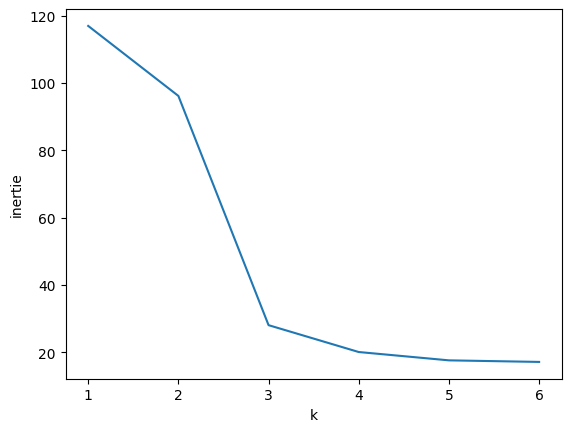

In [27]:
kmax = 6
I = []
for k in range(1, kmax+1):
    classes,centres = k_moyennes(k)
    I.append(inertie(classes, centres))
plt.plot(range(1, kmax+1), I)
plt.xlabel("k")
plt.ylabel("inertie")
plt.show()

````{admonition} Question
 On prend la valeur de $k$ obtenue à la question précédente. Pour chaque classe, afficher les voitures de cette classe ainsi que le centre (en appliquant `inverse_standardisation` dessus).
````

````{admonition} Solution
:class: tip, dropdown
``` python
classes, centres = k_moyennes(4)
for i in range(len(centres)):
    print("Centre", i, ":", inverse_standardisation(centres[i]))
    for j in classes[i]:
        print(" ", noms[j])
    print()
```
````

````{admonition} Question
 Pour savoir ce qui différencie deux classes, on peut regarder les coordonnées du vecteur dont les extrémités sont les centres des deux classes. Quelles sont les caractéristiques qui différencient les voitures familiale des voitures citadines ? Les voitures sportives des voitures citadines ?
````

````{admonition} Solution
:class: tip, dropdown
``` python
attributs_noms
```
``` 
['cylindrée',
 'chevaux',
 'longueur',
 'largeur',
 'hauteur',
 'poids',
 'vitesse_max',
 '0_100',
 'consommation']

```
````

````{admonition} Solution
:class: tip, dropdown
``` python
np.array(centres[1]) - np.array(centres[3])
```
``` 
array([-0.31896446, -0.1361693 , -1.88526004, -1.02047793, -1.22359991,
       -2.32875335, -0.11255414,  0.15027082, -0.75037631])

```
````